In [67]:
#Importation des librairies connues 

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns 

 

#Librairies pour l'analyse de texte/pour le prétraitement des données textuelles 

#"Regular expressions"(re) : opérations de recherche et remplacement sur chaînes de textes 

import re 

import string 

#"Natural language toolkit"(nltk) : traitement langage naturel 

import nltk 

from string import punctuation 

#Liste les mots vides souvent utilisés (pour pouvoir les supprimer dans le prétraitement des données) 

from nltk.corpus import stopwords 

#fonction pour diviser un texte en mots individuels 

from nltk.tokenize import word_tokenize 

#ramène les mots à leur forme de base 

from nltk.stem import WordNetLemmatizer 

from nltk.stem import PorterStemmer 

#outil pour générer nuages de mots 

from wordcloud import WordCloud 

#transforme des données textuels en une matrice 

from sklearn.feature_extraction.text import TfidfVectorizer 

 

 

In [68]:
df = pd.read_csv('Tweets.csv') 

In [69]:
df.head() 

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [70]:
#Prétraitement des données 

#Retirer toutes les données non nécessaires ou abondantes 

#La colonne 'textID' ne nous sert pas à grand chose 

df.drop(['textID'], axis = 1, inplace = True) 

df.head(3) 

 

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative


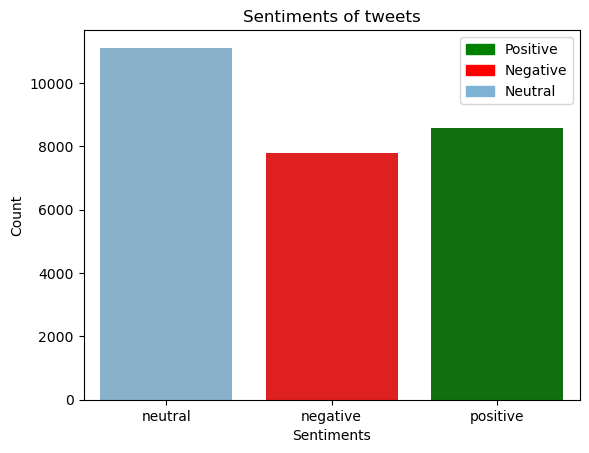

In [71]:
#Visualisation des données 

colors = {'positive': 'green', 'negative': 'red', 'neutral': '#7FB3D5'} 

sns.countplot(x = 'sentiment', data=df, palette=colors) 

legend_labels = {value: key.capitalize() for key, value in colors.items()} 

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]  

plt.legend(handles, legend_labels.values(), loc='upper right') 

plt.xlabel("Sentiments") 

plt.ylabel("Count") 

plt.title("Sentiments of tweets") 

plt.show() 

In [72]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           27480 non-null  object
 1   selected_text  27480 non-null  object
 2   sentiment      27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


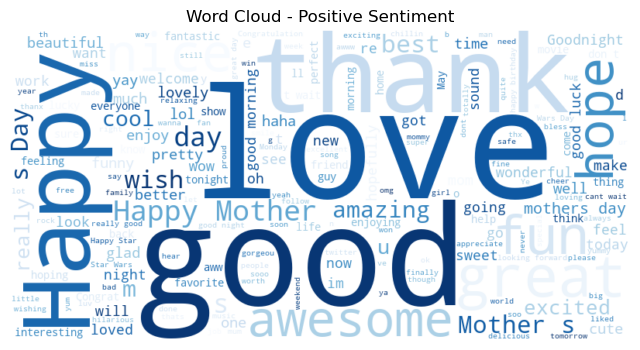

In [73]:
text_positive = " ".join(i for i in df[df['sentiment']=='positive']['selected_text']) 
wordcloud_positive = WordCloud( 

    background_color="white", 

    width=800, 

    height=400, 

    max_words=200, 

    colormap='Blues', 

    contour_color='black',   

).generate(text_positive) 

 

plt.figure(figsize=(8, 8)) 

plt.imshow(wordcloud_positive, interpolation='bilinear') 

plt.axis("off") #Masque les axes 

plt.title('Word Cloud - Positive Sentiment') 

plt.show() 

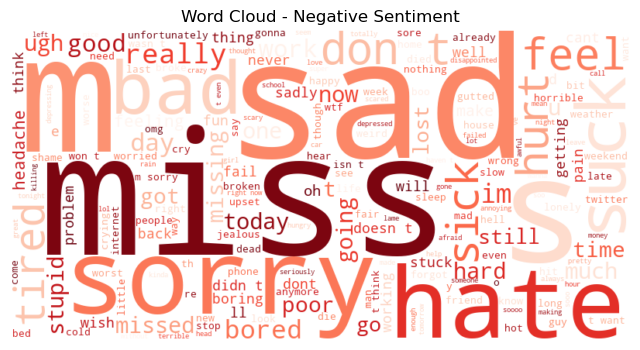

In [74]:
text_positive = " ".join(i for i in df[df['sentiment']=='negative']['selected_text']) 
wordcloud_positive = WordCloud( 

    background_color="white", 

    width=800, 

    height=400, 

    max_words=200, 

    colormap='Reds', 

    contour_color='black',   

).generate(text_positive) 

 

plt.figure(figsize=(8, 8)) 

plt.imshow(wordcloud_positive, interpolation='bilinear') 

plt.axis("off") #Masque les axes 

plt.title('Word Cloud - Negative Sentiment') 

plt.show() 

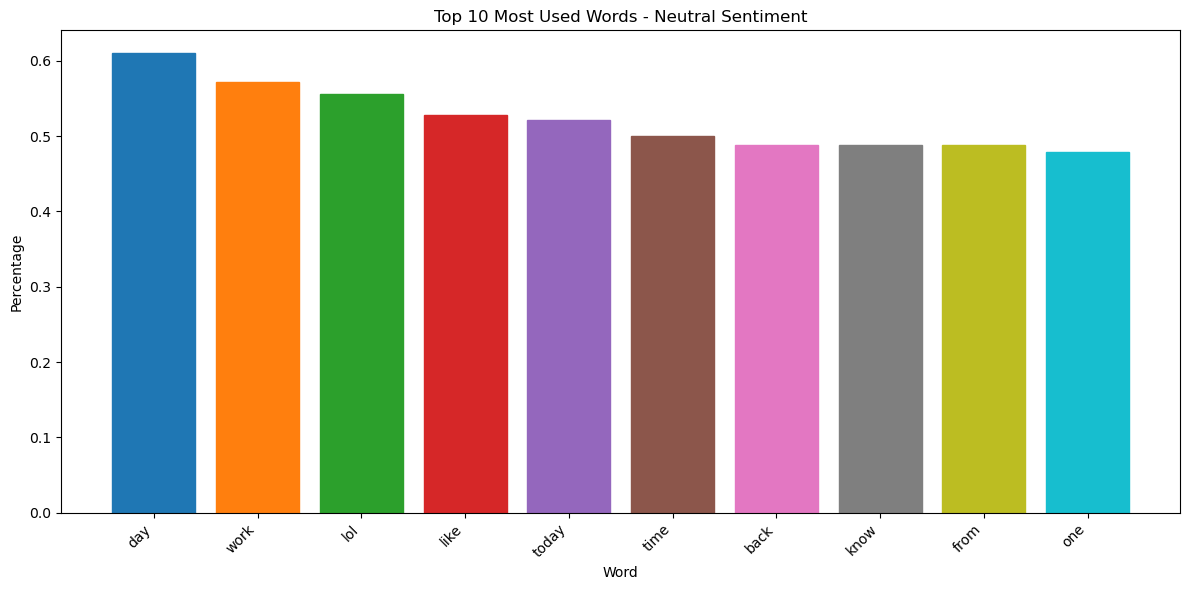

In [75]:
from sklearn.feature_extraction.text import CountVectorizer 

from itertools import cycle 

 

neutral_texts = df[df['sentiment'] == 'neutral']['selected_text'] 

neutral_texts = neutral_texts.astype(str) 

all_neutral_text = ' '.join(neutral_texts) 

stop_words = ["to", "the", "it", "my", "you", "and", "in", "is", "for", "on", "have", "of", "but","me","that","just","with", "at", "so", "be", "not", "get", "was", "up", "can","now", "out","get","no","this","go","all","are","do","what","got", "we", "your","going"] 

vectorizer = CountVectorizer(stop_words=stop_words) 

word_counts = vectorizer.fit_transform([all_neutral_text]) 

words = vectorizer.get_feature_names_out() 

word_frequencies = word_counts.sum(axis=0).A1 

word_df = pd.DataFrame({'Word': words, 'Frequency': word_frequencies}) 

word_df = word_df.sort_values(by='Frequency', ascending=False) 

word_df['Percentage'] = (word_df['Frequency'] / word_df['Frequency'].sum()) * 100 

top_words = word_df.head(10) 

 

plt.figure(figsize=(12, 6)) 

bar_colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) 

bars = plt.bar(top_words['Word'], top_words['Percentage'], color=[next(bar_colors) for _ in range(len(top_words))]) 

 

for bar, color in zip(bars, bar_colors): 

    bar.set_color(color) 

 

plt.xlabel('Word') 

plt.ylabel('Percentage') 

plt.title('Top 10 Most Used Words - Neutral Sentiment') 

plt.xticks(rotation=45, ha='right') 

plt.tight_layout() 

plt.show() 

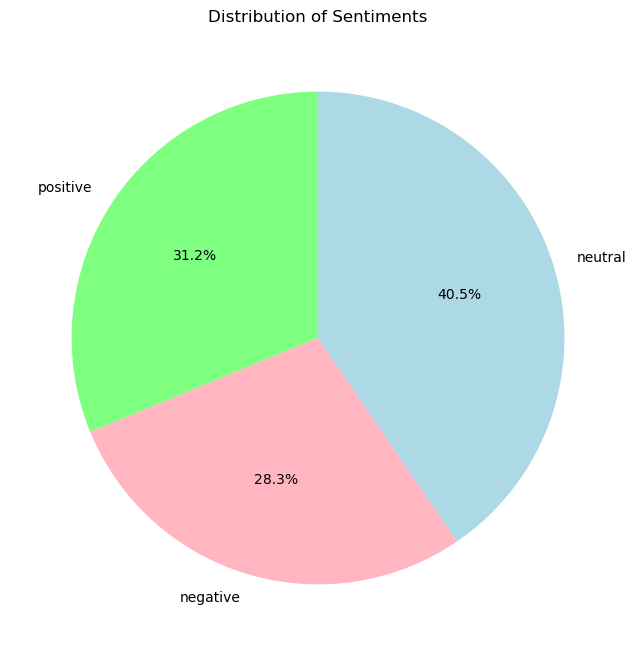

In [76]:
positive_count = len(df[df['sentiment'] == 'positive']) 

negative_count = len(df[df['sentiment'] == 'negative']) 

neutral_count = len(df[df['sentiment'] == 'neutral']) 

 

total_count = positive_count + negative_count + neutral_count 

positive_percentage = (positive_count / total_count) * 100 

negative_percentage = (negative_count / total_count) * 100 

neutral_percentage = (neutral_count / total_count) * 100 

 

labels = ['positive', 'negative', 'neutral'] 

sizes = [positive_percentage, negative_percentage, neutral_percentage] 

colors = ['#7FFF7F', '#FFB6C1', '#ADD8E6'] 

 

plt.figure(figsize=(8, 8)) 

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90) 

plt.title('Distribution of Sentiments') 

plt.show() 

In [77]:
df.head(10) 

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,fun,positive
7,Soooo high,Soooo high,neutral
8,Both of you,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [79]:
def clean_text(text): 

    if isinstance(text, str):  # Vérifiez si le texte est une chaîne 

        punc = list(punctuation) 

        stop = stopwords.words('english') 

        bad_tokens = stop + punc 

        lemma = WordNetLemmatizer() 

        tokens = word_tokenize(text) 

        word_tokens = [t for t in tokens if t.isalpha()] 

        clean_tokens = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens] 

        return ' '.join(clean_tokens) 

    else: 

        return ''  # Si ce n'est pas une chaîne, retournez une chaîne vide 

 

 

df['cleanText'] = df['text'].apply(clean_text) #new column on the right of the table 

In [80]:
df.head(10)

,text,selected_text,sentiment,cleanText
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,i responded i going
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i miss san diego
2,my boss is bullying me...,bullying me,negative,bos bullying
3,what interview! leave me alone,leave me alone,negative,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,son put release already bought
5,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http shameless plugging best ranger forum earth
6,2am feedings for the baby are fun when he is a...,fun,positive,feeding baby fun smile coo
7,Soooo high,Soooo high,neutral,soooo high
8,Both of you,Both of you,neutral,both
9,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,journey wow u became cooler hehe possible


In [81]:
 

#Model building 

from sklearn.preprocessing import LabelEncoder 

from sklearn.model_selection import train_test_split 

from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Embedding, LSTM, Dense 

from tensorflow.keras.preprocessing.text import Tokenizer 

from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [82]:
print(df)

                                                    text  \
0                    I`d have responded, if I were going   
1          Sooo SAD I will miss you here in San Diego!!!   
2                              my boss is bullying me...   
3                         what interview! leave me alone   
4       Sons of ****, why couldn`t they put them on t...   
...                                                  ...   
27476   wish we could come see u on Denver  husband l...   
27477   I`ve wondered about rake to.  The client has ...   
27478   Yay good for both of you. Enjoy the break - y...   
27479                         But it was worth it  ****.   
27480     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  \
0                    I`d have responded, if I were going   neutral   
1                                               Sooo SAD  negative   
2                                            bullying me  negative   

In [83]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with the 'cleanText' and 'sentiment' columns
# Encode target variable

label_encoder = LabelEncoder()

# Check if 'sentiment' column exists in your DataFrame ('df')
if 'sentiment' in df.columns:
    df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])
else:
    print("Column 'sentiment' not found in DataFrame.")

# Display DataFrame or do further operations
print(df)



                                                    text  \
0                    I`d have responded, if I were going   
1          Sooo SAD I will miss you here in San Diego!!!   
2                              my boss is bullying me...   
3                         what interview! leave me alone   
4       Sons of ****, why couldn`t they put them on t...   
...                                                  ...   
27476   wish we could come see u on Denver  husband l...   
27477   I`ve wondered about rake to.  The client has ...   
27478   Yay good for both of you. Enjoy the break - y...   
27479                         But it was worth it  ****.   
27480     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  \
0                    I`d have responded, if I were going   neutral   
1                                               Sooo SAD  negative   
2                                            bullying me  negative   

In [84]:
plt.plot(X_train, label='Train')
plt.plot(X_test, label='Test')
plt.legend()

Error in callback <function _draw_all_if_interactive at 0x00000152C3193280> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000152C21883A0> (for post_execute):


KeyboardInterrupt: 

In [86]:
import pandas as pd 

from sklearn.preprocessing import LabelEncoder 

from sklearn.model_selection import train_test_split 

from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D 

from tensorflow.keras.preprocessing.text import Tokenizer 

from tensorflow.keras.preprocessing.sequence import pad_sequences 

from tensorflow.keras.callbacks import EarlyStopping 

In [87]:
# Assuming 'df' is your DataFrame with the 'cleanText' and 'sentiment' columns 

# Encode target variable 

label_encoder = LabelEncoder() 

df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment']) 

In [88]:
# Split data 

X_train, X_test, y_train, y_test = train_test_split(df['cleanText'], df['sentiment_encoded'], test_size=0.2, random_state=42) 

  

In [89]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

In [90]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Msi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import numpy as np

def preprocess_string(word):
    # Implement your string preprocessing here (e.g., removing punctuation)
    # Example: return word.strip().strip(string.punctuation)
    return word

def tokenize(X_train, Y_train, X_test, Y_test):
    word_list = []
    stop_words = set(stopwords.words('english'))

    # Process X_train
    final_list_train = []
    for sent in X_train:
        if isinstance(sent, str):
            words = [preprocess_string(word) for word in sent.lower().split() if word not in stop_words and word != '']
            final_list_train.append(words)
            word_list.extend(words)

    # Process X_test
    final_list_test = []
    for sent in X_test:
        if isinstance(sent, str):
            words = [preprocess_string(word) for word in sent.lower().split() if word not in stop_words and word != '']
            final_list_test.append(words)

    # Create a corpus
    corpus = Counter(word_list)
    corpus_ = sorted(corpus, key=corpus.get, reverse=True)[:1000]
    onehot_dict = {w: i + 1 for i, w in enumerate(corpus_)}

    # Tokenize
    final_list_train = [[onehot_dict[word] for word in sent if word in onehot_dict] for sent in final_list_train]
    final_list_test = [[onehot_dict[word] for word in sent if word in onehot_dict] for sent in final_list_test]

    # Encode labels
    encoded_train = [1 if label == 'positive' else 0 for label in Y_train]
    encoded_test = [1 if label == 'positive' else 0 for label in Y_test]

    return (
        np.array(final_list_train, dtype=object),
        np.array(encoded_train),
        np.array(final_list_test, dtype=object),
        np.array(encoded_test),
        onehot_dict
    )

In [92]:
X_train_processed, Y_train_encoded, X_test_processed, Y_test_encoded, onehot_dict = tokenize(X_train, y_train, X_test, y_test)

In [93]:
onehot_dict

{'day': 1,
 'good': 2,
 'get': 3,
 'like': 4,
 'go': 5,
 'http': 6,
 'love': 7,
 'got': 8,
 'u': 9,
 'work': 10,
 'today': 11,
 'going': 12,
 'time': 13,
 'one': 14,
 'lol': 15,
 'happy': 16,
 'know': 17,
 'back': 18,
 'really': 19,
 'im': 20,
 'want': 21,
 'see': 22,
 'night': 23,
 'mother': 24,
 'home': 25,
 'new': 26,
 'think': 27,
 'well': 28,
 'na': 29,
 'still': 30,
 'oh': 31,
 'miss': 32,
 'much': 33,
 'thanks': 34,
 'great': 35,
 'need': 36,
 'feel': 37,
 'hope': 38,
 'make': 39,
 'last': 40,
 'haha': 41,
 'morning': 42,
 'wish': 43,
 'twitter': 44,
 'fun': 45,
 'tomorrow': 46,
 'week': 47,
 'would': 48,
 'tonight': 49,
 'sad': 50,
 'sorry': 51,
 'thing': 52,
 'look': 53,
 'bad': 54,
 'come': 55,
 'right': 56,
 'mom': 57,
 'yeah': 58,
 'friend': 59,
 'gon': 60,
 'nice': 61,
 'though': 62,
 'say': 63,
 'weekend': 64,
 'way': 65,
 'sleep': 66,
 'better': 67,
 'could': 68,
 'getting': 69,
 'people': 70,
 'bed': 71,
 'hour': 72,
 'next': 73,
 'hate': 74,
 'show': 75,
 'school': 76,

In [94]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [95]:
# Finding the maximum length for padding 

max_length = max([len(x) for x in X_train_seq]) 

In [96]:
# Padding sequences 

X_train_padded = pad_sequences(X_train_seq, maxlen=max_length) 

X_test_padded = pad_sequences(X_test_seq, maxlen=max_length) 

  

In [97]:
# LSTM model 

model = Sequential() 

model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length)) 

model.add(SpatialDropout1D(0.2))  # Spatial dropout layer to reduce overfitting 

model.add(LSTM(128)) 

model.add(Dense(1, activation='sigmoid')) 

  

In [98]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [99]:
#Early stopping to prevent overfitting 

early_stopping = EarlyStopping(patience=3, restore_best_weights=True) 

In [101]:
# Training the model 

batch_size = 30

epochs = 20 

history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, 

                    validation_split=0.1, callbacks=[early_stopping]) 

Epoch 1/20
660/660 [==============================] - 19s 28ms/step - loss: -12.9959 - accuracy: 0.4754 - val_loss: -20.2115 - val_accuracy: 0.5111
Epoch 2/20
660/660 [==============================] - 19s 28ms/step - loss: -35.6834 - accuracy: 0.5185 - val_loss: -37.7526 - val_accuracy: 0.5089
Epoch 3/20
660/660 [==============================] - 19s 29ms/step - loss: -58.7015 - accuracy: 0.5305 - val_loss: -55.2735 - val_accuracy: 0.4957
Epoch 4/20
660/660 [==============================] - 19s 29ms/step - loss: -82.3892 - accuracy: 0.5305 - val_loss: -72.9341 - val_accuracy: 0.4948
Epoch 5/20
660/660 [==============================] - 20s 30ms/step - loss: -105.3042 - accuracy: 0.5310 - val_loss: -81.4651 - val_accuracy: 0.5075
Epoch 6/20
660/660 [==============================] - 20s 30ms/step - loss: -127.9369 - accuracy: 0.5408 - val_loss: -100.9594 - val_accuracy: 0.4966
Epoch 7/20
660/660 [==============================] - 20s 30ms/step - loss: -152.3009 - accuracy: 0.5374 - va

In [102]:
# Evaluate the model on the test set 

loss, accuracy = model.evaluate(X_test_padded, y_test) 

print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}') 

172/172 [==============================] - 1s 8ms/step - loss: -342.3871 - accuracy: 0.4844
Test loss: -342.3871, Test accuracy: 0.4844


In [103]:
# Train the LSTM model 

model.fit(X_train_padded, y_train, epochs=15, batch_size=22) 

  

# Evaluate the model 

loss, accuracy = model.evaluate(X_test_padded, y_test) 

print(f"Accuracy of LSTM model: {accuracy:.4f}\n") 


Epoch 1/15
1000/1000 [==============================] - 22s 22ms/step - loss: -463.2556 - accuracy: 0.5602
Epoch 2/15
1000/1000 [==============================] - 22s 22ms/step - loss: -502.7368 - accuracy: 0.5642
Epoch 3/15
1000/1000 [==============================] - 22s 22ms/step - loss: -540.1699 - accuracy: 0.5637
Epoch 4/15
1000/1000 [==============================] - 22s 22ms/step - loss: -571.7828 - accuracy: 0.5627
Epoch 5/15
1000/1000 [==============================] - 24s 24ms/step - loss: -607.7067 - accuracy: 0.5657
Epoch 6/15
1000/1000 [==============================] - 23s 23ms/step - loss: -644.4415 - accuracy: 0.5683
Epoch 7/15
1000/1000 [==============================] - 22s 22ms/step - loss: -680.4969 - accuracy: 0.5721
Epoch 8/15
1000/1000 [==============================] - 22s 22ms/step - loss: -714.5548 - accuracy: 0.5718
Epoch 9/15
1000/1000 [==============================] - 22s 22ms/step - loss: -751.9255 - accuracy: 0.5716
Epoch 10/15
1000/1000 [==============